In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import seaborn as sns
import folium

# Exploration and initial clean-up on small sets

Import the dataset into pandas

In [2]:
df = pd.read_csv('/Users/sanjayroberts1/Desktop/data_science_tools1/sudeste.csv')

Save df to hdf for easy loading each time. (Tried saving to pickle but apparently there is a bug for saving large files to pickle in pandas)

In [3]:
df.to_hdf('weather.hdf','mydata',mode='w')

In [4]:
df = pd.read_hdf('weather.hdf','mydata')

Take a look at the data we are working with

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779168 entries, 0 to 9779167
Data columns (total 31 columns):
wsid    int64
wsnm    object
elvt    float64
lat     float64
lon     float64
inme    object
city    object
prov    object
mdct    object
date    object
yr      int64
mo      int64
da      int64
hr      int64
prcp    float64
stp     float64
smax    float64
smin    float64
gbrd    float64
temp    float64
dewp    float64
tmax    float64
dmax    float64
tmin    float64
dmin    float64
hmdy    float64
hmax    float64
hmin    float64
wdsp    float64
wdct    float64
gust    float64
dtypes: float64(20), int64(5), object(6)
memory usage: 2.3+ GB


In [6]:
df.describe()

,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
count,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,1.407984e+06,9.779168e+06,9.779168e+06,9.779168e+06,5.670348e+06,9.779137e+06,9.778693e+06,9.779142e+06,9.778858e+06,9.779134e+06,9.778361e+06,9.779168e+06,9.779156e+06,9.779124e+06,8.853607e+06,9.779168e+06,9.462694e+06
mean,3.592531e+02,5.940923e+02,-2.023082e+01,-4.464590e+01,2.011164e+03,6.521960e+00,1.575465e+01,1.150000e+01,9.366544e-01,8.804292e+02,8.803034e+02,8.798331e+02,1.176371e+03,2.047423e+01,1.472681e+01,2.110503e+01,1.524025e+01,1.986418e+01,1.422089e+01,6.726667e+01,6.996991e+01,6.441965e+01,1.998156e+00,1.385991e+02,4.494015e+00
std,3.901630e+01,3.980379e+02,3.172643e+00,4.882117e+00,3.207774e+00,3.425538e+00,8.802154e+00,6.922190e+00,2.923291e+00,2.482650e+02,2.489171e+02,2.487716e+02,1.138754e+03,7.331125e+00,5.805413e+00,7.545549e+00,5.866811e+00,7.134849e+00,5.777089e+00,2.654213e+01,2.643371e+01,2.656550e+01,1.618531e+00,1.052018e+02,2.981790e+00
min,1.780000e+02,0.000000e+00,-2.496282e+01,-5.667732e+01,2.000000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.800000e+00,-1.000000e+01,-3.200000e+00,-1.000000e+01,-8.500000e+00,-1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.280000e+02,2.830000e+02,-2.239580e+01,-4.743410e+01,2.009000e+03,4.000000e+00,8.000000e+00,5.000000e+00,0.000000e+00,9.113000e+02,9.115000e+02,9.110000e+02,6.500000e+01,1.770000e+01,1.210000e+01,1.820000e+01,1.270000e+01,1.720000e+01,1.160000e+01,5.300000e+01,5.800000e+01,4.900000e+01,8.000000e-01,5.600000e+01,2.300000e+00
50%,3.580000e+02,5.730000e+02,-2.075041e+01,-4.445378e+01,2.011000e+03,7.000000e+00,1.600000e+01,1.200000e+01,0.000000e+00,9.442000e+02,9.444000e+02,9.439000e+02,8.634270e+02,2.140000e+01,1.610000e+01,2.190000e+01,1.660000e+01,2.080000e+01,1.560000e+01,7.400000e+01,7.800000e+01,7.000000e+01,1.700000e+00,1.140000e+02,4.200000e+00
75%,3.940000e+02,8.750000e+02,-1.891707e+01,-4.243575e+01,2.014000e+03,9.000000e+00,2.300000e+01,1.800000e+01,6.000000e-01,9.731000e+02,9.733000e+02,9.728000e+02,2.103000e+03,2.490000e+01,1.890000e+01,2.580000e+01,1.940000e+01,2.420000e+01,1.840000e+01,8.900000e+01,9.100000e+01,8.600000e+01,2.900000e+00,2.160000e+02,6.300000e+00
max,4.230000e+02,1.758000e+03,0.000000e+00,0.000000e+00,2.016000e+03,1.200000e+01,3.100000e+01,2.300000e+01,1.000000e+02,1.050000e+03,1.050000e+03,1.050000e+03,1.158649e+04,4.490000e+01,4.270000e+01,4.500000e+01,4.480000e+01,4.500000e+01,4.490000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.980000e+01,3.600000e+02,5.000000e+01


Shape of the dataframe. We have about 10 million observations

In [7]:
df.shape

(9779168, 31)

Need to change mdct to index and to a datetime object

In [8]:
df = df.set_index('mdct')
df.index = pd.to_datetime(df.index)

How many NA values do we need to investigate?

In [9]:
df.isna().sum()

wsid          0
wsnm          0
elvt          0
lat           0
lon           0
inme          0
city          0
prov          0
date          0
yr            0
mo            0
da            0
hr            0
prcp    8371184
stp           0
smax          0
smin          0
gbrd    4108820
temp         31
dewp        475
tmax         26
dmax        310
tmin         34
dmin        807
hmdy          0
hmax         12
hmin         44
wdsp     925561
wdct          0
gust     316474
dtype: int64

## Investigate one station to get a bearing on how to clean

In [10]:
is_178 = df['wsid'] == 178
w_station_178 = df[is_178]

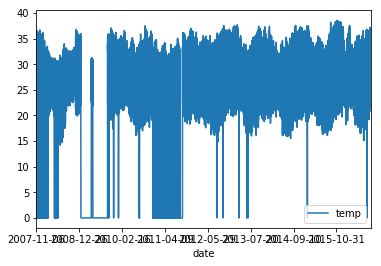

In [11]:
w_station_178.plot(x='date', y='temp')

16 years of temperature data does not plot well. Looks like we need to zoom in on a smaller subset. From this, we see that there is missing data (NAs) around year 2008-2010. Maybe the station wasn't funded and didn't report reading then? Also, lots of zero values for this station. The data stabilizes a bit better in the later years, hovering between 16C-37C.

Let's zoom in on about 2 weeks of hourly data for another station that has cleaner readings. 
About 2 weeks of data from sept 15 - sept 30, 2016 from station 384 in Rio de Janeiro

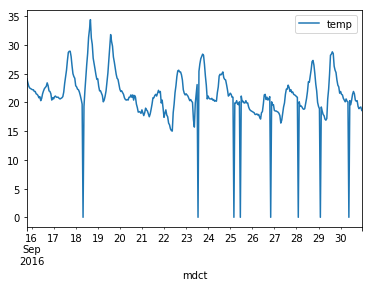

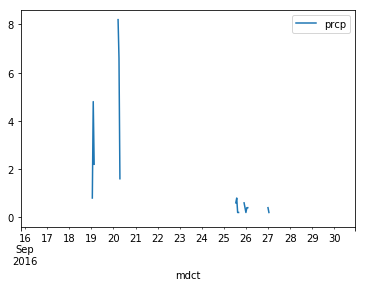

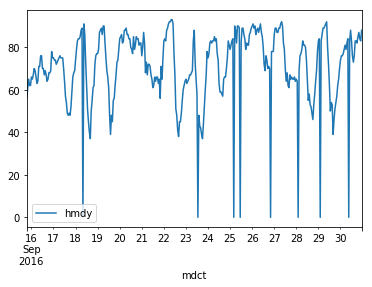

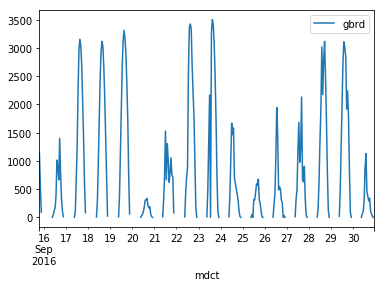

In [12]:
is_384 = df['wsid'] == 384
station_384 = df[is_384]
station_384_tail_365 = station_384.tail(365)
station_384_tail_365 = station_384_tail_365.reset_index()
station_384_tail_365.plot(x='mdct', y='temp')
station_384_tail_365.plot(x='mdct', y='prcp')
station_384_tail_365.plot(x='mdct', y='hmdy')
station_384_tail_365.plot(x='mdct', y='gbrd')


Temperature and humidity varies correctly except for zero values.
Precipitation data is sparse and looks to only have readings when it rains, other than that the sensor reports NA values.
Solar radiation (gbrd) looks decent as well. Reporting values while the sun is out (daylight) and reporting NA when the sun is down (nighttime). We can even see that on the day it rains in the precipitation graph (20th - 21st), solar radiation is reporting low values, most likely due to cloud cover. 

Let's make the plots prettier and plot the data in tandem.

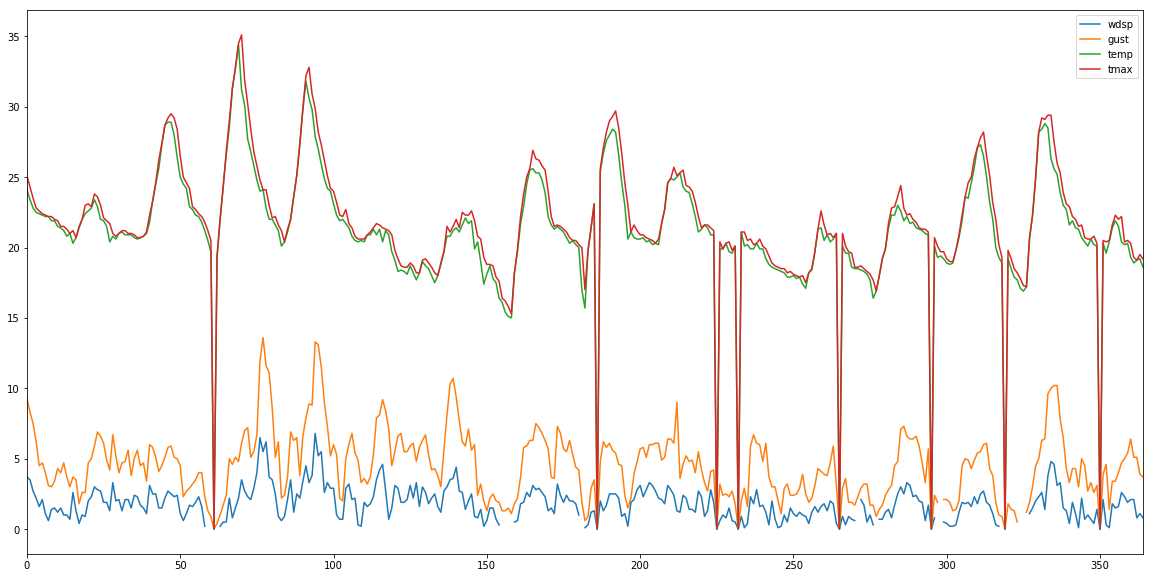

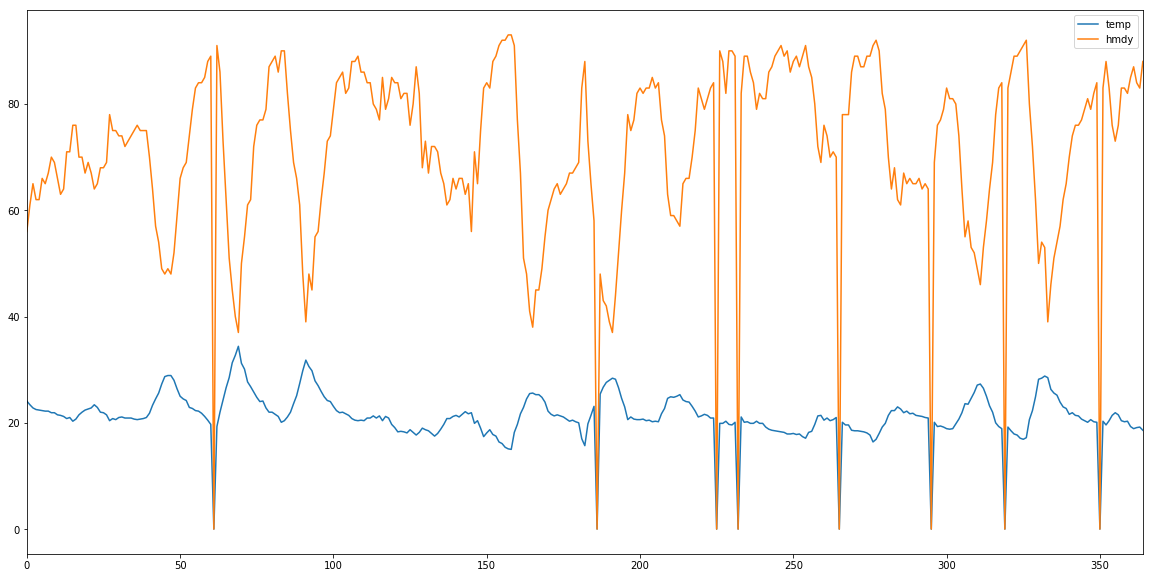

In [13]:
plt.rcParams['figure.figsize'] = (20, 10)
station_384_tail_365[['wdsp', 'gust', 'temp', 'tmax']].plot()
station_384_tail_365[['temp', 'hmdy']].plot()

# Interpolation - fill in the missing gaps
Let's look at just temperature and try to fill in the gaps so the data makes more sense. From the graph below, it doesn't make sense for the temperature to drop from 20C to 0C in the midst of an hour, so it makes more sense that a sensor reported incorrectly

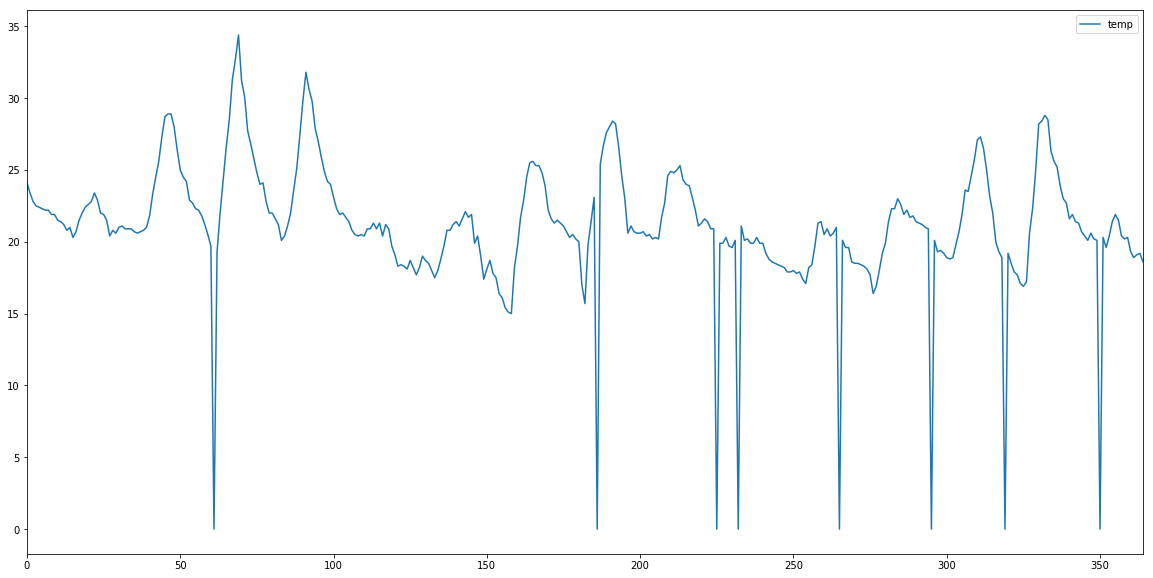

In [14]:
station_384_tail_365[['temp']].plot()

First, change all 0's to NaNs, then use interpolation to fill in missing values.

In [15]:
station_384_temp = station_384_tail_365['temp']
station_384_temp.replace(0, np.nan, inplace=True)

Graph pre-interpolation:

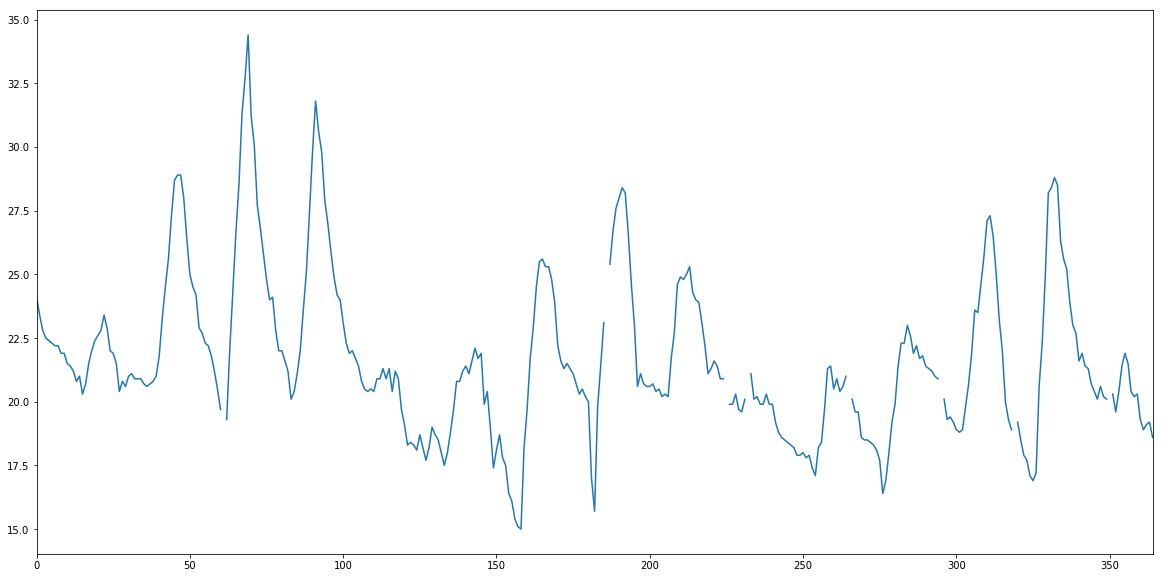

In [16]:
station_384_temp.plot()

Interpolate linearly

In [17]:
station_384_temp.interpolate('linear', inplace=True, limit_direction='both')

Plot post interpolation looks a lot better and fills in the missing holes nicely. This is a big assumption but I think it makes sense since most of the missing data is one hour here or there, so interpolating on small  holes seem appropriate.

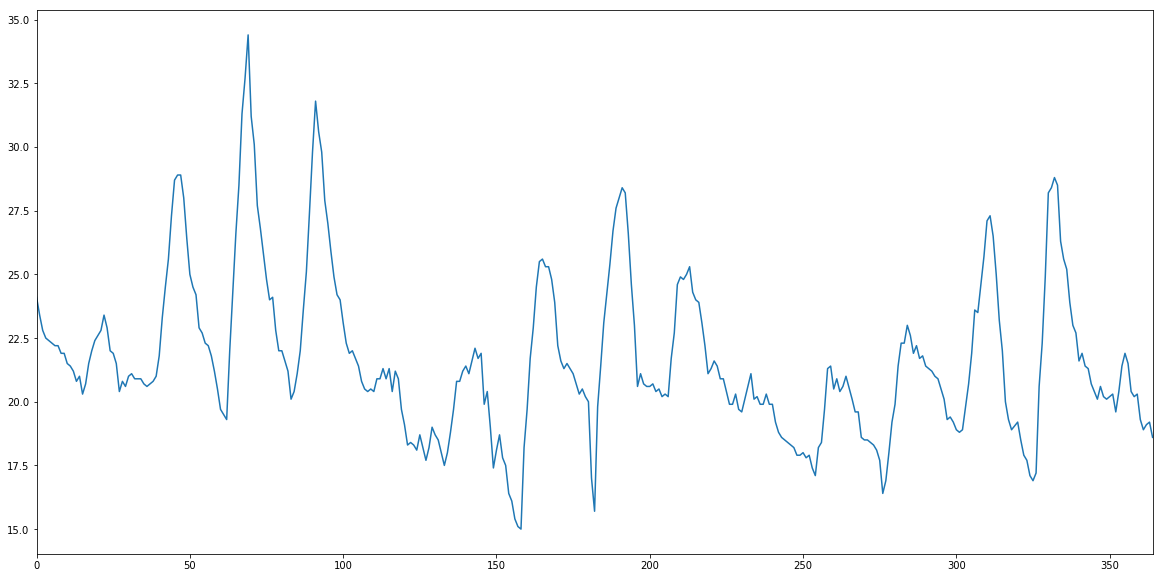

In [18]:
station_384_temp.plot()

Let's go down to data from one day 

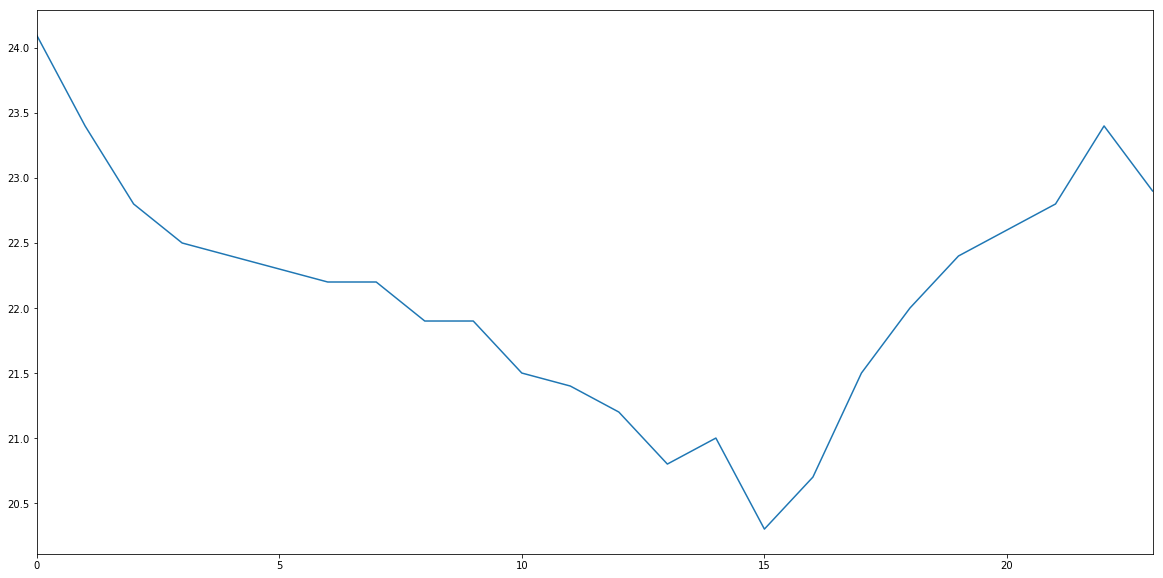

In [19]:
station_384_temp_sept_oct = station_384_temp.head(24)
station_384_temp_sept_oct.plot()

## Explore one year of data

Try a year of data from one station 

In [20]:
is_385 = df['wsid'] == 385
station_385 = df[is_385]
station_385_year = station_385.tail(8760)

Grab just the temperature data and see how it looks.

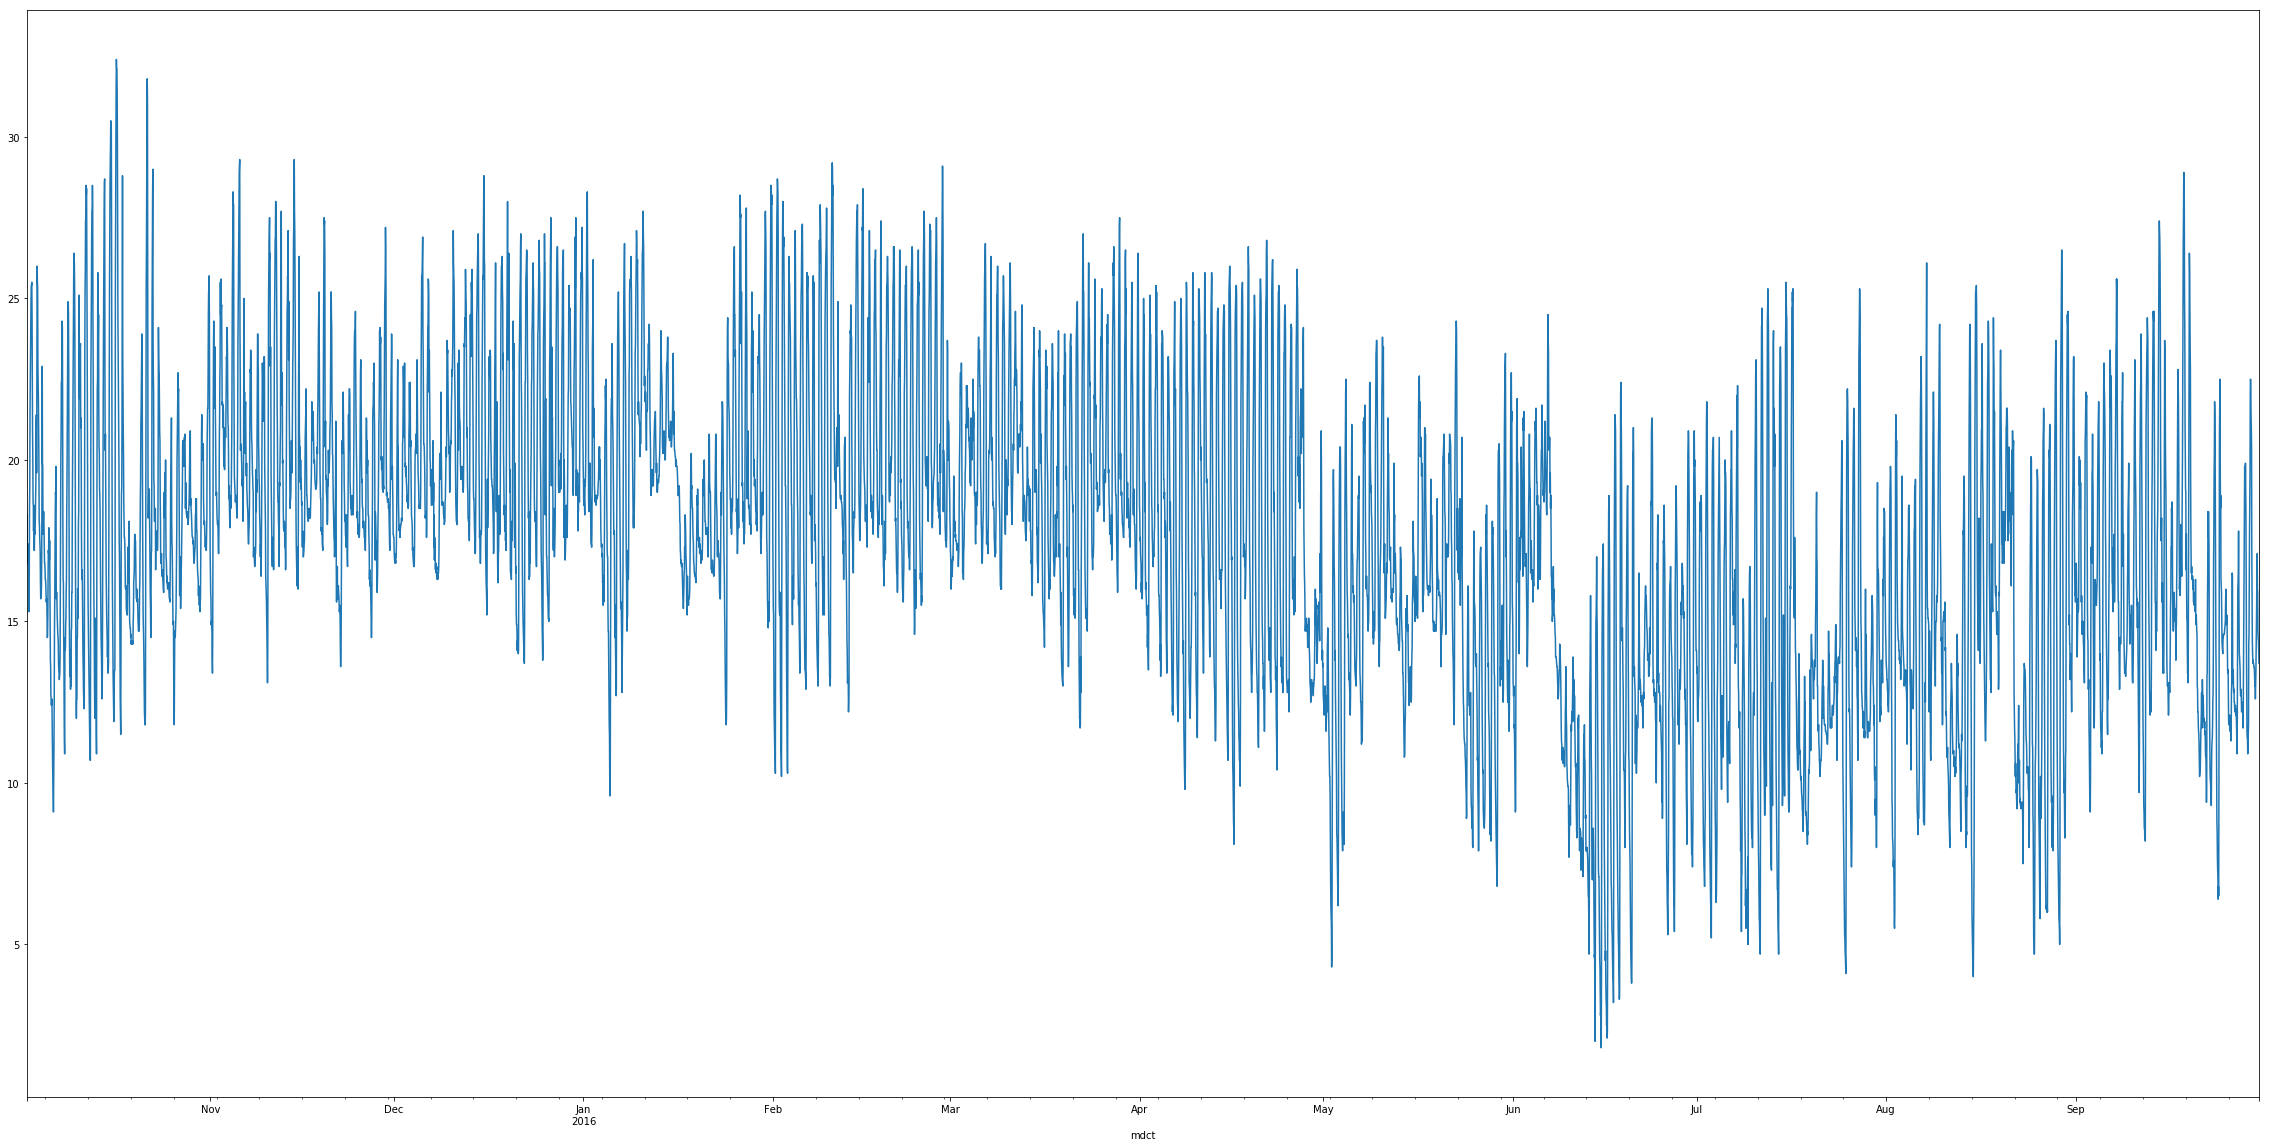

In [21]:
pd.options.mode.chained_assignment = None  # default='warn'
station_385_year_temp = station_385_year['temp']
station_385_year_temp.replace(0, np.nan, inplace=True)
station_385_year_temp.interpolate('linear', inplace=True, limit_direction='both')
plt.rcParams['figure.figsize'] = (40, 20)
station_385_year_temp.plot()

Look at a year's worth of gbrd (solar radiation) data. NaN values in gbrd (solar radiation) occur when the sun goes down. So we only get 8 to 12 data points each day.

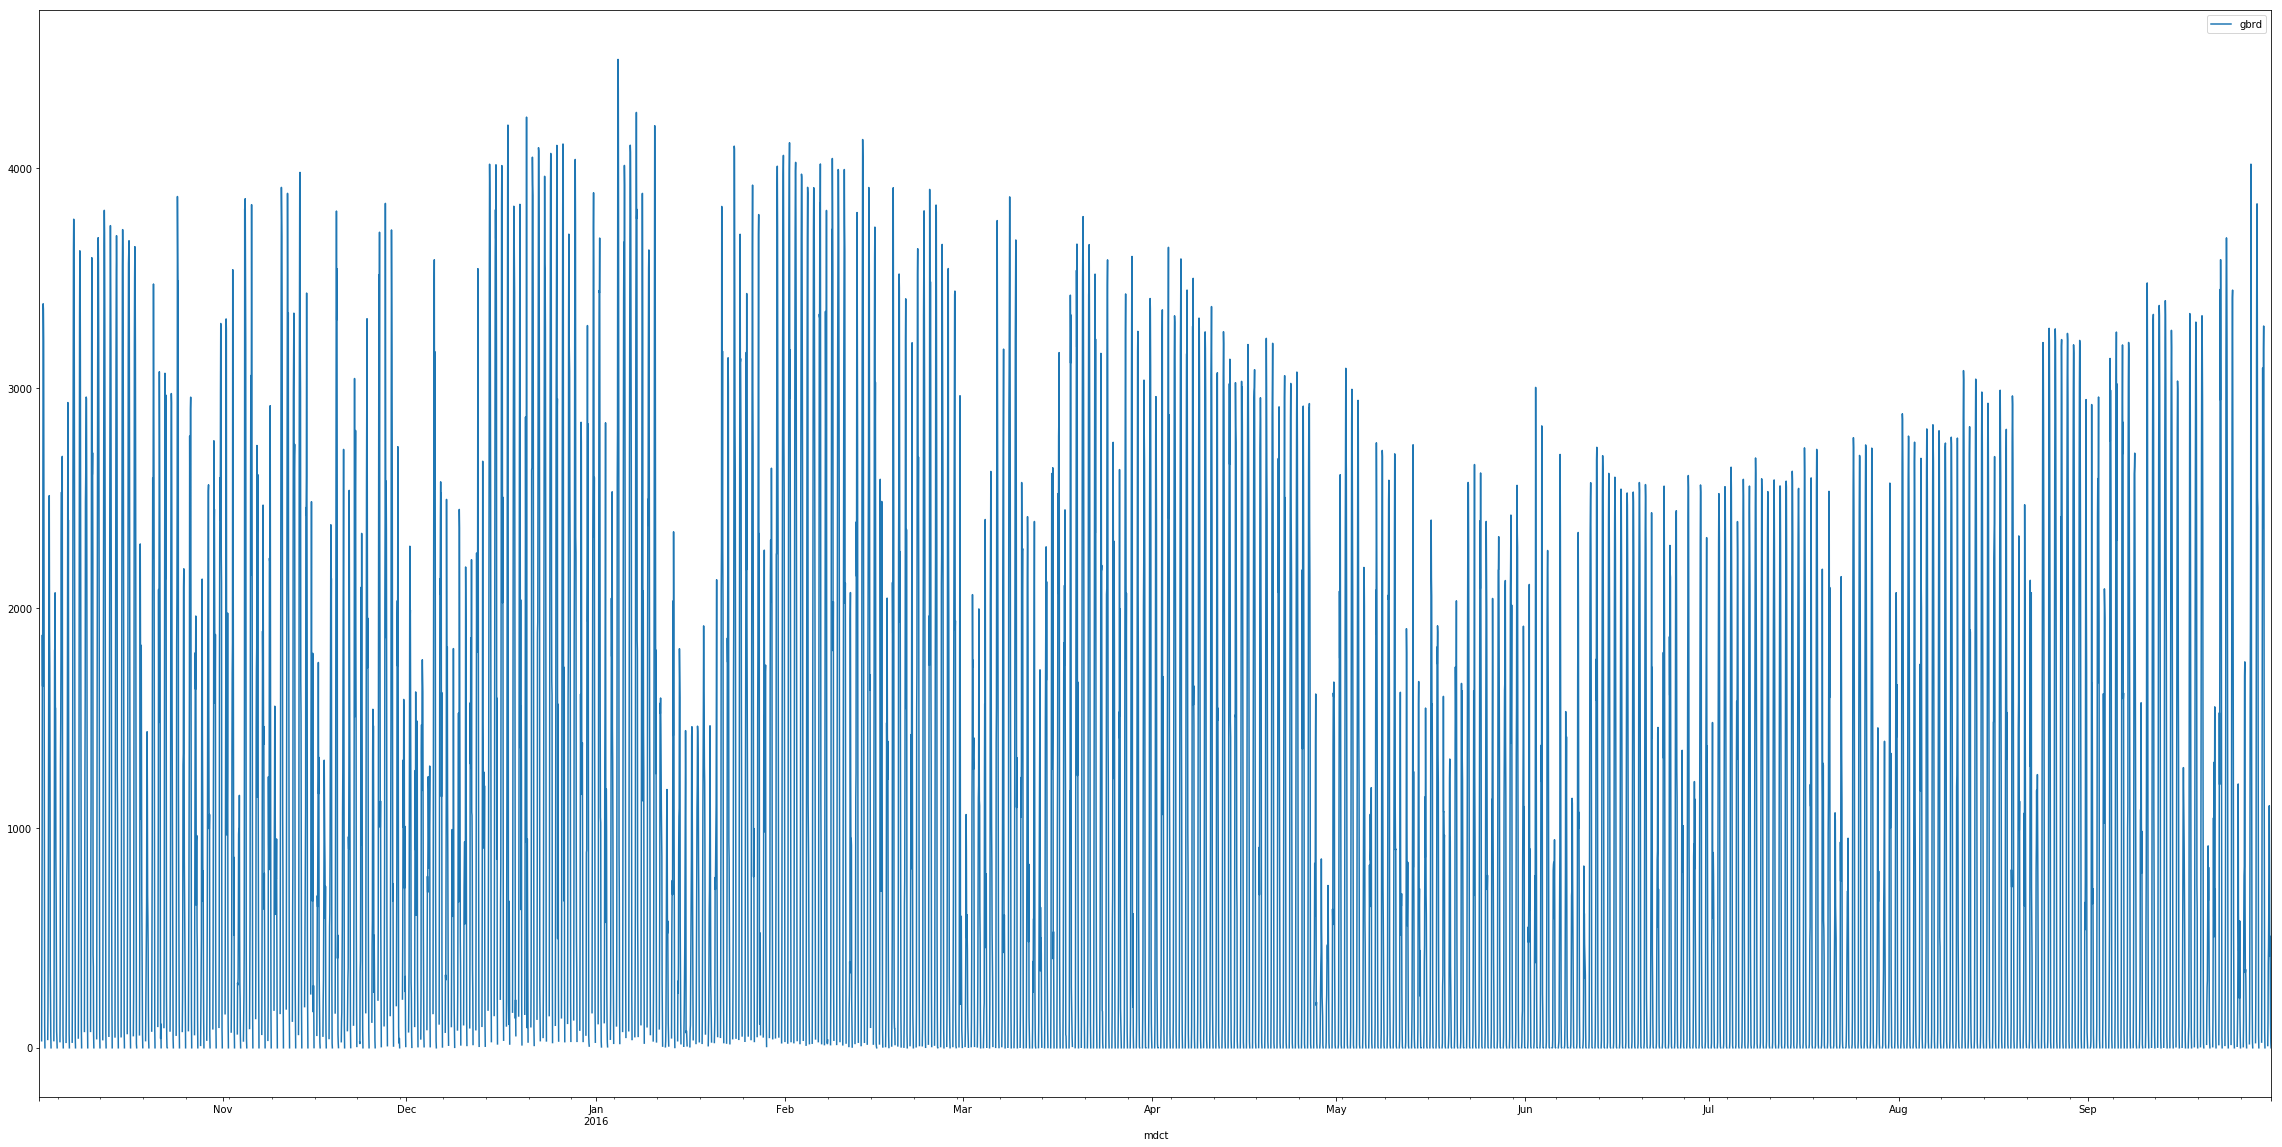

In [22]:
station_385_year[['gbrd']].plot()

Let's play with some rain data. From our observations on precipitation above, it looks like stations report NA values when it doesn't rain, so let's fill those NA's with zero. Then get total and average rain per month for station 385.

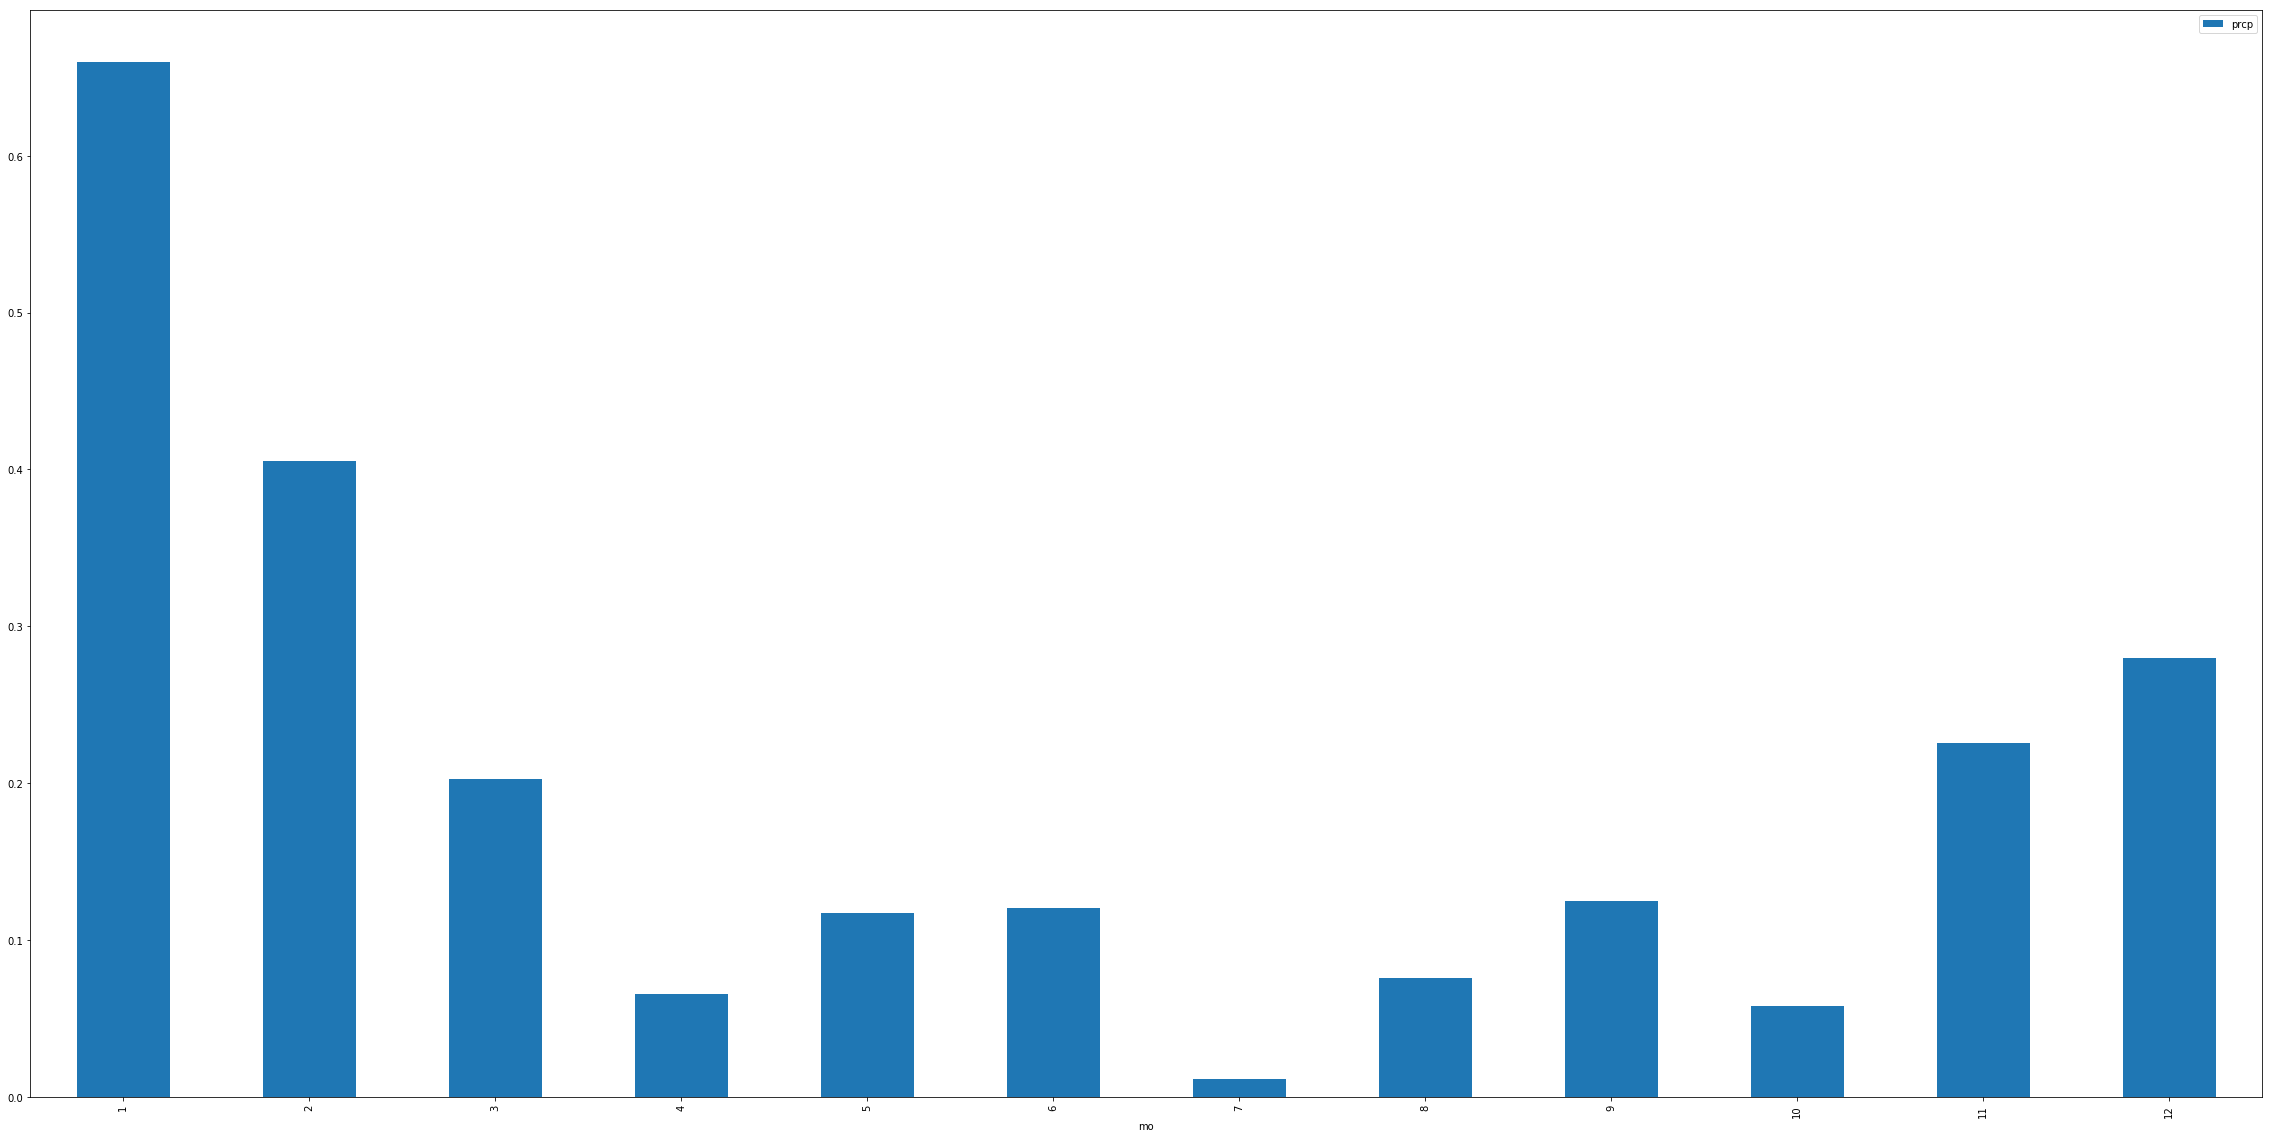

In [23]:
rain_df = station_385_year[['mo','prcp']].fillna(0)
total_rain = rain_df.groupby('mo').sum().reset_index()
average_rain = rain_df.groupby('mo').mean().reset_index()
average_rain.plot( x='mo', y='prcp', kind='bar')

Looks like the summer months (December, January, February) get the most rain. Remember, we are south of the equator, so their summer is our winter. 

Let's try the plots in seaborn, just to compare how they look against matplotlib. 

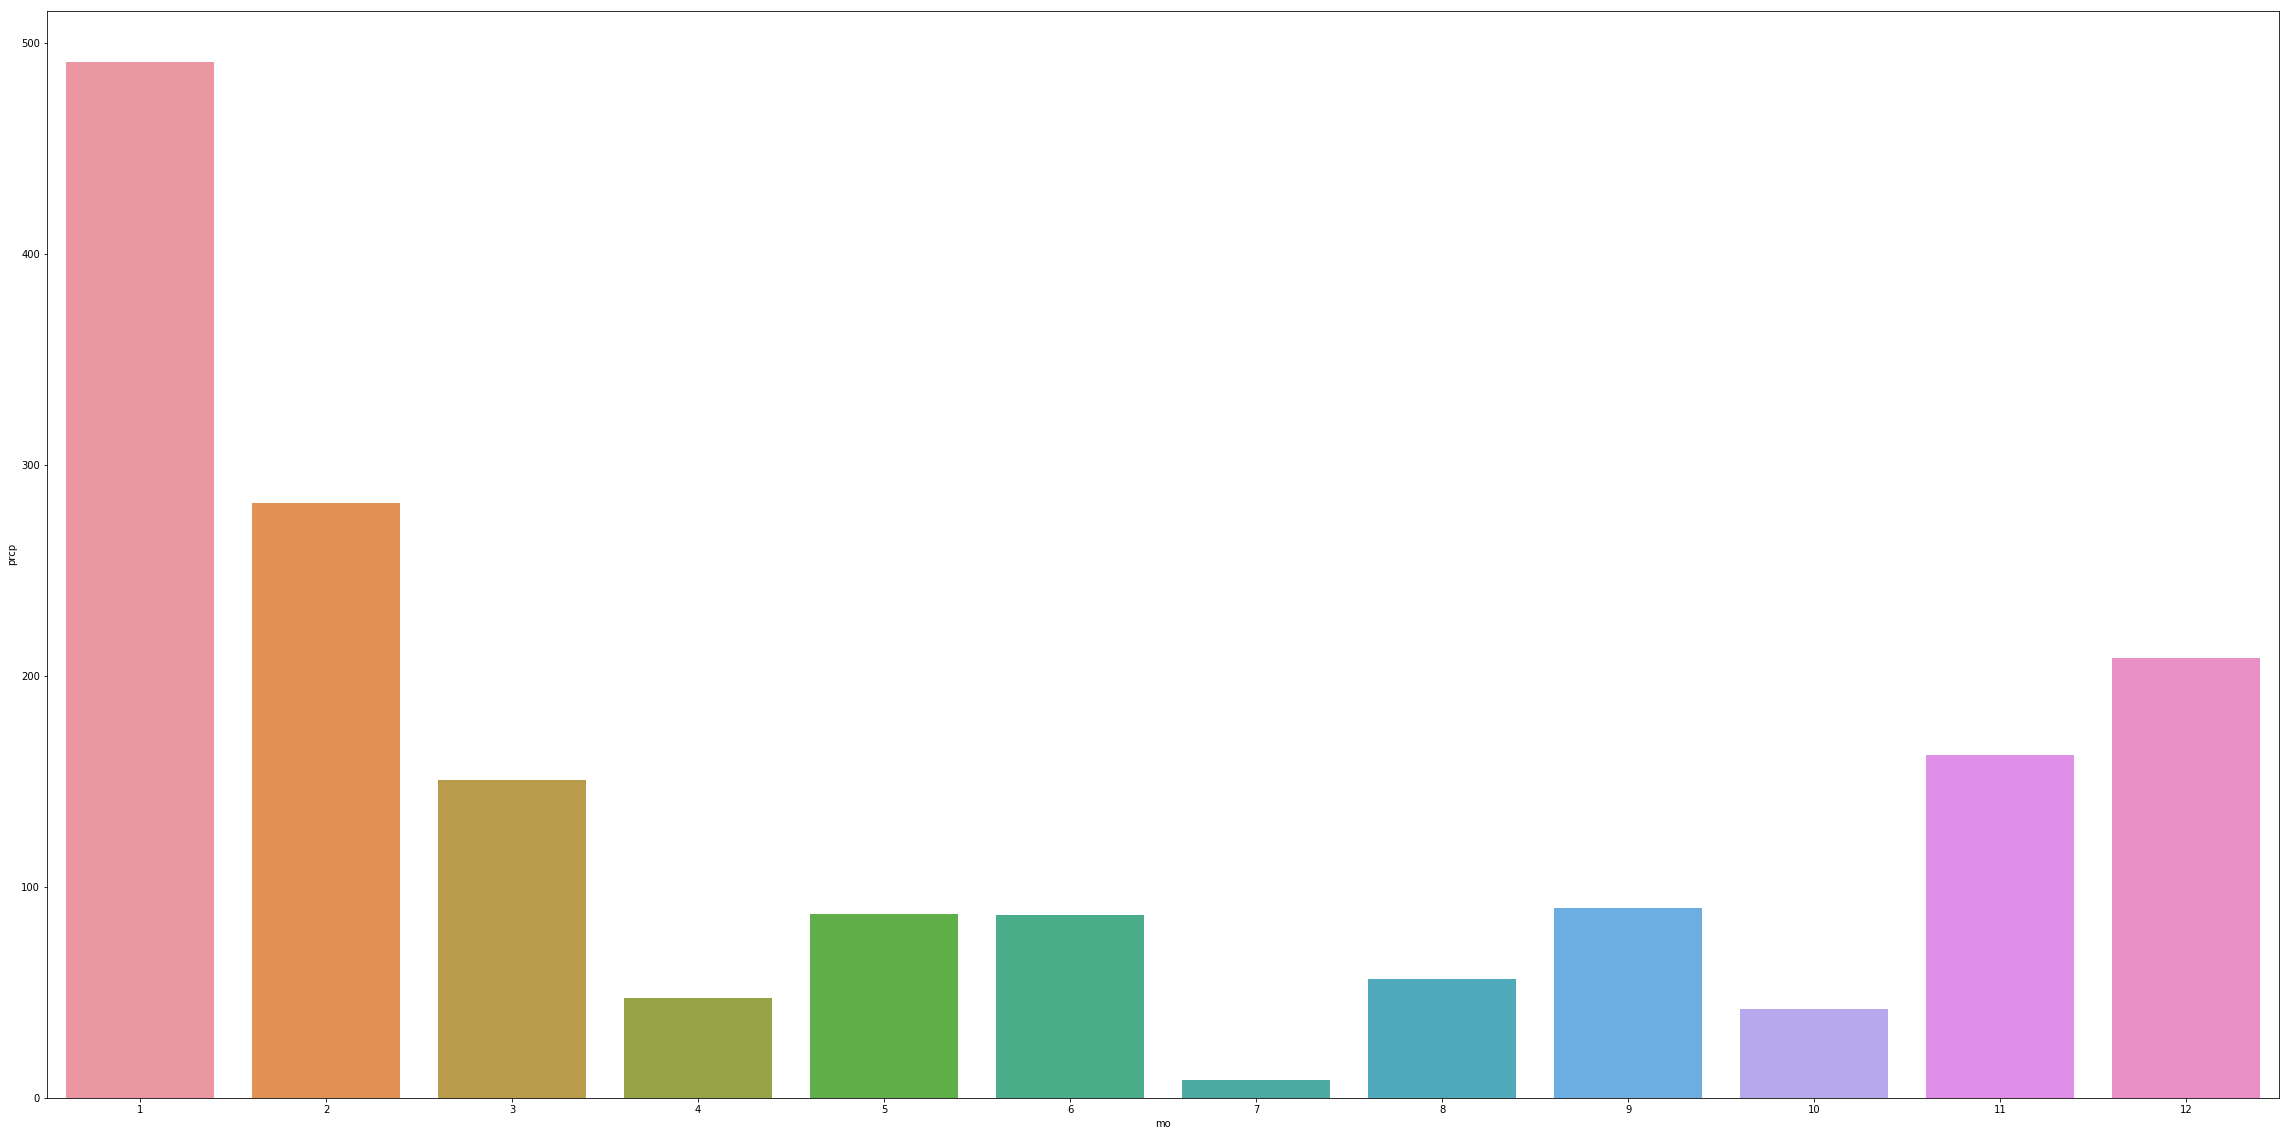

In [24]:
sns.barplot(x=total_rain.mo, y=total_rain.prcp)

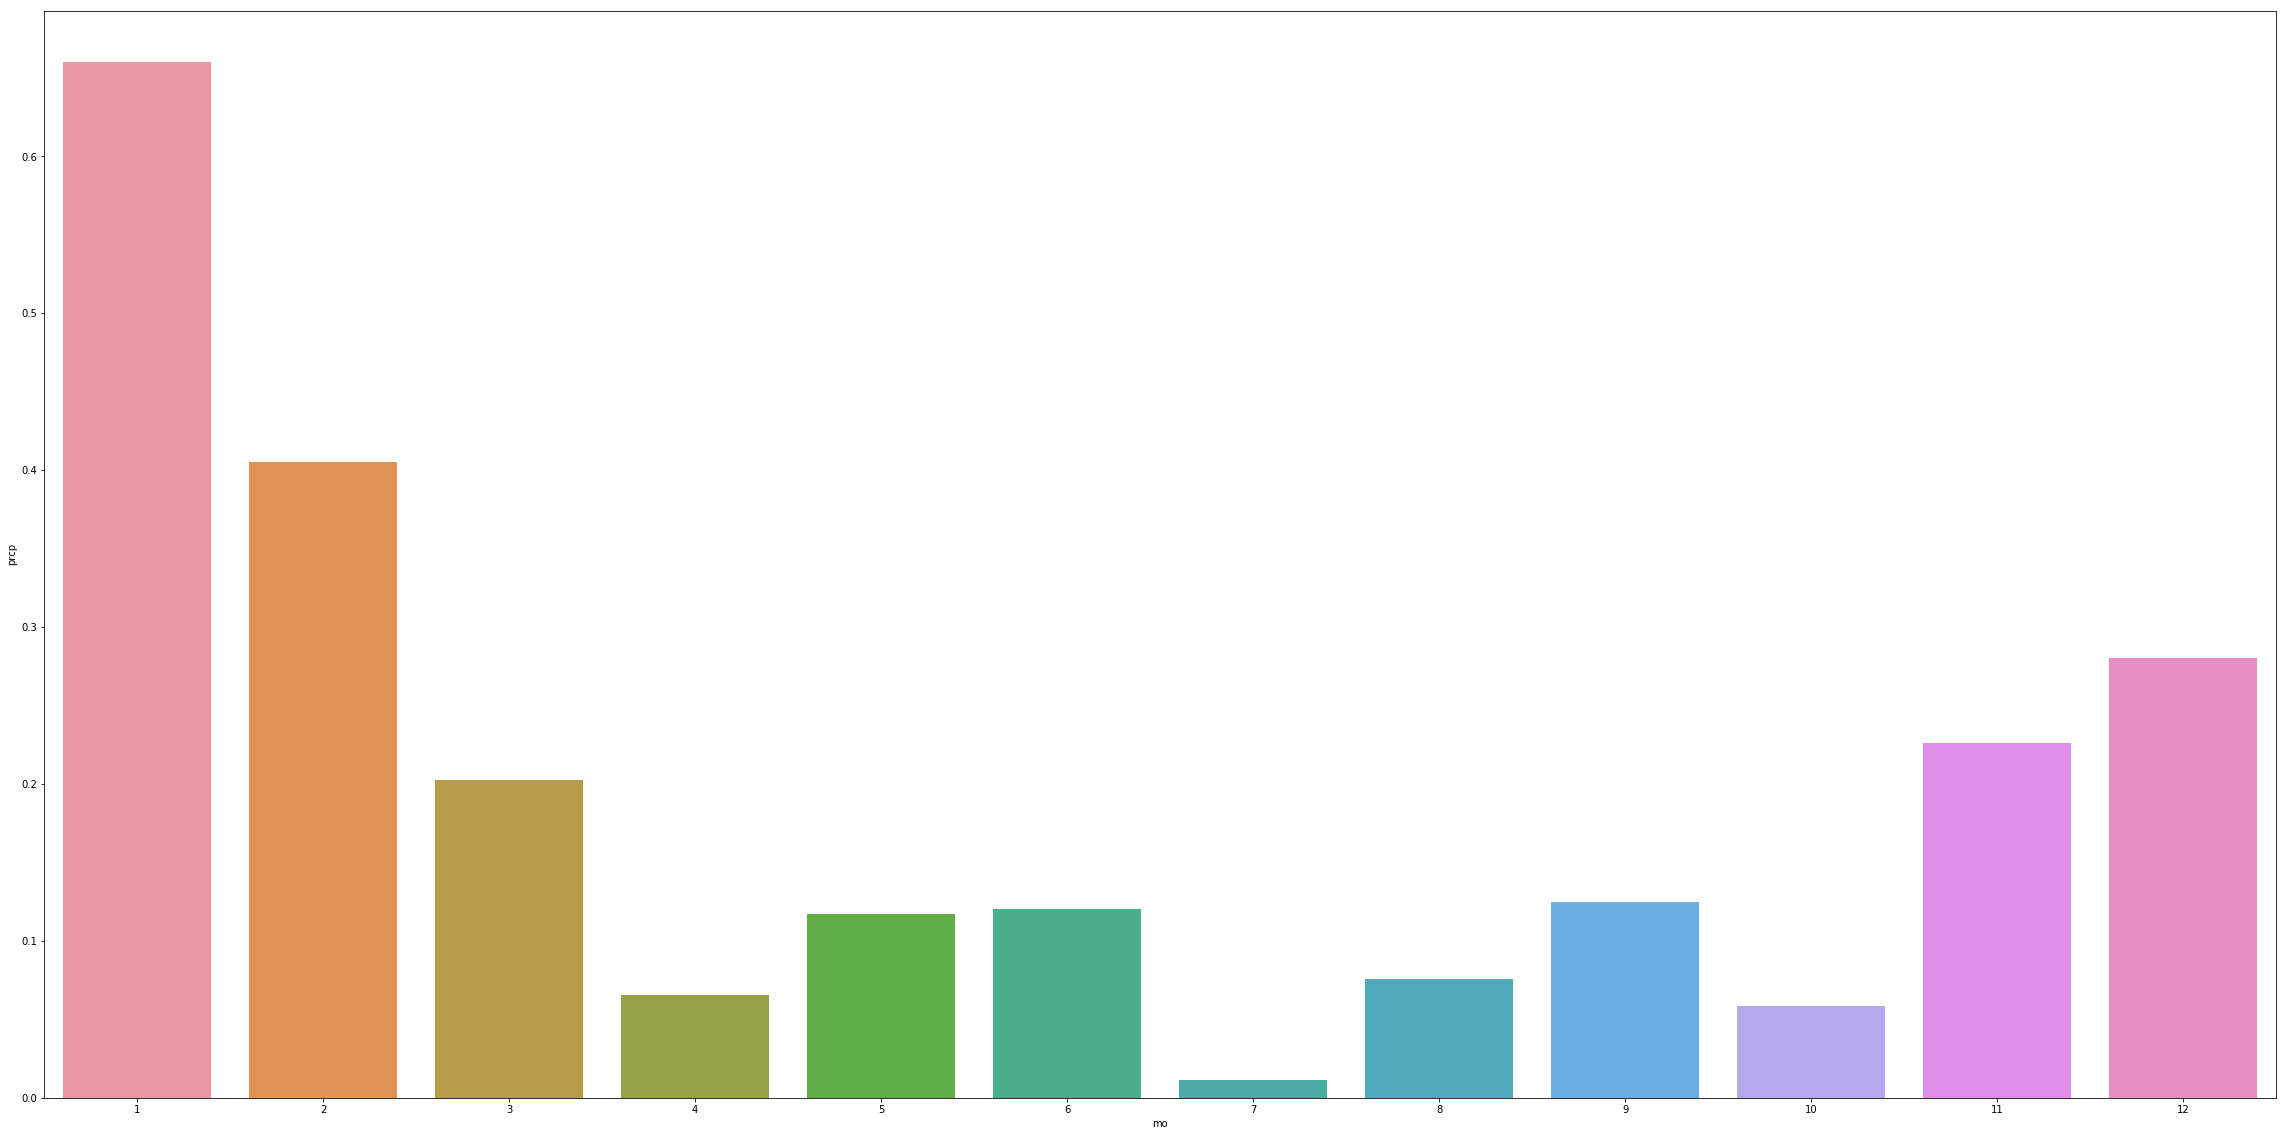

In [25]:
sns.barplot(x=average_rain.mo, y=average_rain.prcp)

### Clean-up on one station

Clean up for one weather station with it's own quarks. This station does not track all years, will need to drop all Null and 0 values for all columns for the beginning part.

- interpolate to clean up temp, tmax, tmin, dmax, dmin, hmax, hmin,
- fill NaNs for precipitation
- fill NaNs for solar radiation
- stp, smax, smin, dewp, hmdy, wdsp, wdct, and gust seem clean (call unique on the values and see if anything looks odd)

In [26]:
is_385 = df['wsid'] == 385
station_385 = df[is_385]

In [27]:
station_385.shape

(52944, 30)

In [28]:
station_385['temp'].replace(0, np.nan, inplace=True)
station_385['temp'].interpolate('linear', inplace=True, limit_direction='both')
station_385['prcp'].fillna(0,inplace=True)
station_385['gbrd'].fillna(0,inplace=True)
station_385['tmax'].replace(0, np.nan, inplace=True)
station_385['tmax'].interpolate('linear', inplace=True, limit_direction='both')
station_385['tmin'].replace(0, np.nan, inplace=True)
station_385['tmin'].interpolate('linear', inplace=True, limit_direction='both')
station_385['dmax'].replace(0, np.nan, inplace=True)
station_385['dmax'].interpolate('linear', inplace=True, limit_direction='both')
station_385['dewp'].replace(0, np.nan, inplace=True)
station_385['dewp'].interpolate('linear', inplace=True, limit_direction='both')
station_385['dmin'].replace(0, np.nan, inplace=True)
station_385['dmin'].interpolate('linear', inplace=True, limit_direction='both')
station_385['hmax'].replace(0, np.nan, inplace=True)
station_385['hmax'].interpolate('linear', inplace=True, limit_direction='both')
station_385['hmin'].replace(0, np.nan, inplace=True)
station_385['hmin'].interpolate('linear', inplace=True, limit_direction='both')

Good way to get unique values for each column to take a quick look if anything looks incorrect

In [29]:
d = {}
for col in station_385:
    d[col] = station_385[col].unique().tolist()
    
print(d['prcp'])

[0.0, 0.2, 1.0, 1.2, 0.6, 0.4, 0.8, 1.4, 4.2, 1.8, 2.6, 2.8, 1.6, 20.6, 8.2, 3.4, 3.6, 3.8, 2.4, 2.2, 3.2, 10.0, 10.4, 2.0, 16.6, 6.2, 13.6, 10.2, 11.2, 3.0, 7.4, 5.8, 23.2, 29.2, 18.6, 30.4, 11.8, 4.8, 15.6, 4.0, 5.0, 21.4, 5.6, 5.4, 8.0, 5.2, 4.6, 21.2, 7.2, 9.2, 20.2, 16.4, 8.6, 7.8, 6.0, 10.8, 12.0, 24.4, 4.4, 6.6, 11.0, 9.0, 22.6, 8.8, 6.8, 11.6, 12.2, 6.4, 9.6, 30.0, 62.8, 18.2, 9.8, 13.0, 15.8, 13.2, 14.8, 12.4, 22.2, 13.4, 11.4, 17.8, 14.2, 7.0, 15.4, 9.4, 15.2, 12.6, 7.6, 17.0, 13.8, 25.4, 8.4, 15.0, 17.2, 10.6, 23.6, 12.8, 19.8, 34.2, 32.2, 20.0, 23.8, 14.0, 16.2, 21.6, 25.0, 20.8, 19.2, 41.0, 21.8, 22.4, 23.4, 14.6, 16.8, 24.2, 27.2, 18.4, 19.6, 19.4, 14.4, 29.4, 52.6, 21.0]


After interpolating and filling NAs, let's see what we are left with

In [30]:
station_385.isna().sum()

wsid    0
wsnm    0
elvt    0
lat     0
lon     0
inme    0
city    0
prov    0
date    0
yr      0
mo      0
da      0
hr      0
prcp    0
stp     0
smax    0
smin    0
gbrd    0
temp    0
dewp    0
tmax    0
dmax    0
tmin    0
dmin    0
hmdy    0
hmax    0
hmin    0
wdsp    0
wdct    0
gust    0
dtype: int64

Analyzing the data, we see that the station was not in operation in the first couple of years, so let's drop those values. Drop where all sensor columns are 0.

In [31]:
col = ['prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin', 'wdsp',
       'wdct', 'gust']
station_385 = station_385[(station_385[col] != 0).any(axis=1)]

Station 385 cleaned. Save to hdf file for later use

In [32]:
station_385.to_hdf('station_385.hdf','mydata',mode='w')

# Clean-up entire dataset

Let's attempt to clean up all stations. Best way is to look at all columns with NA values and with zero values and see if it makes sense.

In [33]:
df = pd.read_hdf('weather.hdf','mydata')
df = df.set_index('mdct')
df.index = pd.to_datetime(df.index)
df.isna().sum()

wsid          0
wsnm          0
elvt          0
lat           0
lon           0
inme          0
city          0
prov          0
date          0
yr            0
mo            0
da            0
hr            0
prcp    8371184
stp           0
smax          0
smin          0
gbrd    4108820
temp         31
dewp        475
tmax         26
dmax        310
tmin         34
dmin        807
hmdy          0
hmax         12
hmin         44
wdsp     925561
wdct          0
gust     316474
dtype: int64

In [34]:
(df == 0).astype(int).sum(axis=0)

wsid         0
wsnm         0
elvt     71760
lat      71760
lon      71760
inme         0
city         0
prov         0
date         0
yr           0
mo           0
da           0
hr      407466
prcp    746679
stp     701723
smax    705438
smin    705358
gbrd    879490
temp    628611
dewp    705849
tmax    631473
dmax    706613
tmin    631410
dmin    714946
hmdy    679673
hmax    677458
hmin    684793
wdsp    828184
wdct    870382
gust    841180
dtype: int64

Some stations do not have wind or rain sensors, owing to why there are so many Null values. Will set them to zero to be able to do cleanup. Gbrd has null values for when the sun is down (little less than half the time which makes sense). Make these zero values also to not affect analysis. Other column null values we can set to zero and interpolate to get a value.

In [35]:
df['prcp'].fillna(0,inplace=True)
df['gbrd'].fillna(0,inplace=True)

Drop where all sensor columns are 0

In [36]:
col = ['prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin', 'wdsp',
       'wdct', 'gust']
df = df[(df[col] != 0).any(axis=1)]

In [37]:
df.shape

(9159199, 30)

9779168 - 9159199 = 619969 columns dropped

Interpolate for everything else

In [38]:
df['temp'].replace(0, np.nan, inplace=True)
df['temp'].interpolate('linear', inplace=True, limit_direction='both')
df['dewp'].replace(0, np.nan, inplace=True)
df['dewp'].interpolate('linear', inplace=True, limit_direction='both')
df['tmax'].replace(0, np.nan, inplace=True)
df['tmax'].interpolate('linear', inplace=True, limit_direction='both')
df['tmin'].replace(0, np.nan, inplace=True)
df['tmin'].interpolate('linear', inplace=True, limit_direction='both')
df['dmax'].replace(0, np.nan, inplace=True)
df['dmax'].interpolate('linear', inplace=True, limit_direction='both')
df['dmin'].replace(0, np.nan, inplace=True)
df['dmin'].interpolate('linear', inplace=True, limit_direction='both')
df['hmax'].replace(0, np.nan, inplace=True)
df['hmax'].interpolate('linear', inplace=True, limit_direction='both')
df['hmin'].replace(0, np.nan, inplace=True)
df['hmin'].interpolate('linear', inplace=True, limit_direction='both')
df['hmdy'].replace(0, np.nan, inplace=True)
df['hmdy'].interpolate('linear', inplace=True, limit_direction='both')
df['wdsp'].interpolate('linear', inplace=True,limit_direction='both')
df['gust'].interpolate('linear', inplace=True,limit_direction='both')

Look at NAs and zeros

In [ ]:
df.isna().sum()

In [ ]:
(df == 0).astype(int).sum(axis=0)

Let's look into why elevation, lat, lon is zero (all same weather station?). Same with smin, smax etc, and look at surrounding values to see if it makes sense.

 - hr, prcp, and gbrd are ok to be 0

In [ ]:
df[df.elvt == 0].index[0]

In [ ]:
df[df.elvt == 0].head()

In [ ]:
df[["wsid", "city", "prov", "elvt", "lat", "lon"]].drop_duplicates()

In [ ]:
df[df.elvt == 0].wsid.unique()

This explains the 0 values. Maybe the metadata for the station did not get input correctly? Let's go to the internet and see what the average lat/lon and elevation is for Guarujá

https://en.wikipedia.org/wiki/Guaruj%C3%A1

It is a very small area (55 sq miles) Elevation is 4 meters lat lon is 23°59′37″S 46°15′23″W --> lat -23.993611, lon -46.256389 We can change this in our dataset to get a more accurate description

In [ ]:
df['elvt'].replace(0, 4, inplace=True)
df['lat'].replace(0, -23.993611, inplace=True)
df['lon'].replace(0, -46.256389, inplace=True)

Let's look at stp. It looks like a bunch of the stations just use the same Smax value as they do for stp..

In [ ]:
stp_smax_equal = df[df['stp'] == df['smax']].count().stp
stp_smax_equal

3652525/9159199 = 0.398, so about 40% of the data has this issue... Does this warrant dropping one of the columns? Or is smax a good enough estimate for both? 

In [ ]:
stp_smin_equal = df[df['stp'] == df['smin']].count().stp
stp_smin_equal

Uhoh, then the other 40% has stp = smin. What about when smax = smin?

In [ ]:
smax_smin_equal = df[df['smax'] == df['smin']].count().stp
smax_smin_equal

9159199 - (3652525 + 3458158 + 92853) = 1955663 rows have independent values for all 3.

Talked to some weather folks and it seems that this is perfectly reasonable for air pressure, min, max to hover around the same values in an hour span. So it actually looks like this is correct. We will keep it as is, and interpolate where there are 0 values since 0 air pressure doesn't make sense.

In [ ]:
df['stp'].replace(0, np.nan, inplace=True)
df['stp'].interpolate('linear', inplace=True, limit_direction='both')
df['smax'].replace(0, np.nan, inplace=True)
df['smax'].interpolate('linear', inplace=True, limit_direction='both')
df['smin'].replace(0, np.nan, inplace=True)
df['smin'].interpolate('linear', inplace=True, limit_direction='both')

#### Air pressure and wind analysis

Let's look at a 2 week sample for station 384

In [ ]:
is_384 = df['wsid'] == 384
station_384 = df[is_384]
station_384_tail_365 = station_384.tail(365)
station_384_tail_365 = station_384_tail_365.reset_index()


station_384_tail_365.plot(x='mdct', y='wdsp')
#station_384_tail_365.plot(x='mdct', y='wdct')
station_384_tail_365.plot(x='mdct', y='gust')
station_384_tail_365.plot(x='mdct', y='stp')
station_384_tail_365.plot(x='mdct', y='smax')
station_384_tail_365.plot(x='mdct', y='smin')


Check one day analysis

In [ ]:
is_384 = df['wsid'] == 384
station_384 = df[is_384]
station_384_tail_365 = station_384.tail(24)
station_384_tail_365 = station_384_tail_365.reset_index()

station_384_tail_365.plot(x='mdct', y='wdsp')
#station_384_tail_365.plot(x='mdct', y='wdct')
station_384_tail_365.plot(x='mdct', y='gust')
station_384_tail_365.plot(x='mdct', y='stp')
station_384_tail_365.plot(x='mdct', y='smax')
station_384_tail_365.plot(x='mdct', y='smin')

### Folium map of weather station location

In [ ]:
a = df[['wsnm','lat','lon']].drop_duplicates()
for i in range(len(a)):
    print("folium.Marker([{}, {}], popup='<b>{}</b>', tooltip=tooltip).add_to(m)".format(a.lat.values[i], a.lon.values[i], a.wsnm.values[i]))


In [ ]:
m = folium.Map(
    location=[-19.481935, -45.593932],
    zoom_start=4,
    tiles='Stamen Terrain'
)

tooltip = 'Click me!'

folium.Marker([-6.835777, -38.311583], popup='<b>SÃO GONÇALO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.271094, -40.306069], popup='<b>VITÓRIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.988388, -40.579572], popup='<b>SANTA TERESA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.356923000000002, -40.06868], popup='<b>LINHARES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.636526, -40.741818], popup='<b>ALFREDO CHAVES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.676198, -39.864051], popup='<b>SÃO MATEUS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.750412, -41.488852], popup='<b>ALEGRE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.100804999999998, -41.039395], popup='<b>PRES. KENNEDY</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.695265, -40.390572], popup='<b>NOVA VENECIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.104194, -41.106861], popup='<b>AFONSO CLAUDIO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.228373, -43.767703000000004], popup='<b>BARBACENA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.605696, -46.949616999999996], popup='<b>ARAXÁ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-16.686316, -43.843763], popup='<b>MONTES CLAROS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.917072, -48.255657], popup='<b>UBERLÂNDIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-16.166773000000003, -40.687756], popup='<b>ALMENARA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.861604, -46.043365], popup='<b>MONTE VERDE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.762607, -42.864013], popup='<b>VIÇOSA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.573824, -42.622413], popup='<b>TIMÓTEO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.952907, -49.525071999999994], popup='<b>ITUIUTABA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.556592000000002, -43.75622], popup='<b>OURO BRANCO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.106502, -44.250928], popup='<b>S.J.DEL REI</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.566513, -45.4043], popup='<b>VARGINHA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.745237, -46.633916], popup='<b>PASSOS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.104867000000002, -42.375904], popup='<b>MURIAÉ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.769965, -43.364329], popup='<b>JUÍZ DE FORA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.53921, -49.518133], popup='<b>CAMPINA VERDE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.98586, -48.151574], popup='<b>CONC. DAS ALAGOAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.883945, -43.969397], popup='<b>BELO HOR. (PAMPULHA)</b>', tooltip=tooltip).add_to(m)
folium.Marker([-17.798799, -40.249933], popup='<b>SERRA DOS AIMORES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.996684, -46.985935], popup='<b>PATROCÍNIO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.454929999999997, -45.453825], popup='<b>FORMIGA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.875270999999998, -47.434102], popup='<b>SACRAMENTO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-14.408228, -44.404123], popup='<b>MONTALVANIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-17.89284, -41.515423], popup='<b>TEÓFILO OTONI</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.200854999999997, -45.459835999999996], popup='<b>TRÊS MARIAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.395799, -44.961909000000006], popup='<b>PASSA QUATRO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.918066, -46.382996], popup='<b>CALDAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.314567, -45.373049], popup='<b>MARIA DA FÉ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.830354, -41.977007], popup='<b>GOVERNADOR VALADARES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.786842, -42.942921000000005], popup='<b>GUANHÃES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.532768, -41.090801], popup='<b>AIMORES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.885398000000002, -44.416883], popup='<b>FLORESTAL</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.481935, -45.593932], popup='<b>DORES DO INDAIÁ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.231052, -43.648269], popup='<b>DIAMANTINA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.747711, -44.453784999999996], popup='<b>CURVELO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-15.085957999999998, -44.016036], popup='<b>MOCAMBINHO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-18.780620000000003, -40.986505], popup='<b>MANTENA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-17.705504, -42.389256], popup='<b>CAPELINHA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-16.554101, -46.881935], popup='<b>UNAI</b>', tooltip=tooltip).add_to(m)
folium.Marker([-14.912284, -42.808473], popup='<b>ESPINOSA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-15.524262, -46.435536], popup='<b>BURITIS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-17.258064, -44.8356], popup='<b>PIRAPORA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-17.561349, -47.199251000000004], popup='<b>GUARDA-MOR</b>', tooltip=tooltip).add_to(m)
folium.Marker([-16.362747, -45.123801], popup='<b>SÃO ROMÃO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-15.300158999999999, -45.617430999999996], popup='<b>CHAPADA GAÚCHA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-15.751535999999998, -41.457786999999996], popup='<b>ÁGUAS VERMELHAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-16.575667000000003, -41.485588], popup='<b>ITAOBIM</b>', tooltip=tooltip).add_to(m)
folium.Marker([-15.723139000000002, -42.43575], popup='<b>RIO PARDO DE MINAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-16.160327, -42.310266], popup='<b>SALINAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-17.78477, -46.119394], popup='<b>JOÃO PINHEIRO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.735757, -42.137146], popup='<b>CARATINGA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.031457, -44.011249], popup='<b>IBIRITÈ (ROLA MOÇA)</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.263378, -42.182817], popup='<b>MANHUAÇU</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.546728, -43.261029], popup='<b>CORONEL PACHECO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-15.448089000000001, -44.366313], popup='<b>JANUARIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.239555, -45.008187], popup='<b>POMPEU</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.909892000000003, -47.114259000000004], popup='<b>SÃO SEBASTIAO DO PARAÍSO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.455288, -44.17338], popup='<b>SETE LAGOAS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-19.980034, -43.958651], popup='<b>BELO HORIZONTE - CERCADINHO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.757868, -43.684843], popup='<b>ECOLOGIA AGRÍCOLA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.050334, -43.595684999999996], popup='<b>MARAMBAIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.589806, -43.282233000000005], popup='<b>XEREM</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.587729, -41.958327000000004], popup='<b>CAMBUCÍ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.975468, -42.02145], popup='<b>ARRAIAL DO CABO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.041647, -41.051871000000006], popup='<b>CAMPOS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.376317999999998, -41.812053000000006], popup='<b>MACAÉ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.450924, -44.444786], popup='<b>RESENDE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.464889000000003, -43.291505], popup='<b>PICO DO COUTO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.358094, -43.695656], popup='<b>VALENÇA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.448922, -42.987146], popup='<b>TERESÓPOLIS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.22354, -44.726863], popup='<b>PARATÍ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.041647, -41.051871000000006], popup='<b>SÃO TOMÉ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.861322, -43.41141], popup='<b>VILA MILITAR</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.334839000000002, -42.676932], popup='<b>NOVA FRIBURGO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.098391, -43.208574], popup='<b>TRÊS RIOS </b>', tooltip=tooltip).add_to(m)
folium.Marker([-13.453981, -56.677323], popup='<b>RIO CLARO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.988286, -43.190436], popup='<b>FORTE DE COPACABANA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.645910999999998, -42.415775], popup='<b>SILVA JARDIM</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.871321, -42.609219], popup='<b>SAQUAREMA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.496294, -46.620088], popup='<b>SAO PAULO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.358052, -49.028877], popup='<b>BAURU</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.750231, -45.603836], popup='<b>CAMPOS DO JORDÃO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.119867000000003, -51.408637], popup='<b>PRESIDENTE PRUDENTE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.584475, -47.382549], popup='<b>FRANCA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.980353, -47.883927], popup='<b>SÃO CARLOS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-24.671654, -47.545896], popup='<b>IGUAPE</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.426035, -47.585552], popup='<b>SOROCABA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.981918, -48.885818], popup='<b>ITAPEVA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.852022, -48.164817], popup='<b>S. MIG. ARCANJO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.949, -49.894546000000005], popup='<b>OURINHOS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.372832, -50.974709999999995], popup='<b>RANCHARIA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.101748999999998, -48.940996999999996], popup='<b>AVARÉ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.703132, -47.623317], popup='<b>PIRACICABA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.666045, -49.734854], popup='<b>LINS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.041667999999998, -45.520841], popup='<b>TAUBATÉ</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.403221, -49.966031], popup='<b>VOTUPORANGA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.165025, -50.595134], popup='<b>JALES</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.319138, -50.930158], popup='<b>VALPARAISO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.085675, -49.920388], popup='<b>JOSÉ BONIFÁCIO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.132937, -48.840426], popup='<b>ARIRANHA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.855567, -48.799717], popup='<b>IBITINGA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.78056, -47.07528], popup='<b>CASA BRANCA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.415062, -46.805292], popup='<b>ITAPIRA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.228362, -45.417055], popup='<b>S LUIS DO PARAITINGA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-22.471204999999998, -48.557573], popup='<b>BARRA BONITA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.993611, -46.256389], popup='<b>MOELA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-24.962819, -48.416379], popup='<b>BARRA DO TURVO</b>', tooltip=tooltip).add_to(m)
folium.Marker([-21.338432, -48.114007], popup='<b>PRADÓPOLIS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.559175, -48.544996999999995], popup='<b>BARRETOS</b>', tooltip=tooltip).add_to(m)
folium.Marker([-20.35976, -47.775220000000004], popup='<b>ITUVERAVA</b>', tooltip=tooltip).add_to(m)
folium.Marker([-23.523889999999998, -46.86945], popup='<b>BARUERI</b>', tooltip=tooltip).add_to(m)

m

2 stations are labelled incorrectly for latitude and longitude (not in SE Brazil). 
Rio Claro and SÃO GONÇALO are common names in Brazil. Digging deeper into it, we see that there are the same named cities in the correctly labeled province:  
https://en.wikipedia.org/wiki/Rio_Claro,_Rio_de_Janeiro
https://en.wikipedia.org/wiki/S%C3%A3o_Gon%C3%A7alo,_Rio_de_Janeiro

Let's go ahead and update the lat and lon values for these two stations
Rio Claro = 22°43′22″S 44°08′09″W = -22.722778, -44.135833
SÃO GONÇALO = 22°49′37″S 43°03′14″W = -22.826944, -43.053889

In [ ]:
df[df['wsnm']=='SÃO GONÇALO'].head(2)

In [ ]:
df[df['wsnm']=='RIO CLARO'].head(2)

In [ ]:
df.loc[df['wsnm']=='RIO CLARO','lat'] = -22.722778
df.loc[df['wsnm']=='RIO CLARO','lon'] = -44.135833
df.loc[df['wsnm']=='SÃO GONÇALO','lat'] = -22.826944
df.loc[df['wsnm']=='SÃO GONÇALO','lon'] = -43.053889

Let's save the cleaned up df now. 

In [ ]:
df.to_hdf('cleaned_df.hdf','mydata',mode='w')

In [ ]:
df = pd.read_hdf('cleaned_df.hdf','mydata')

### Note about cleaning time series data from multiple sensors

Even after all this cleanup, there is still not much you can do about missing chunks of data from a weather station. The two examples below show, that even with interpolation, we are quite limited. Overall, it is difficult to get realiable data from over a 16 year period. The first graph shows a big chunk of data missing for  2004 and some of 2005, with one small line connecting the two.

The graph below that shows a much cleaner dataset/weather station.

In [ ]:
sns.set(rc={'figure.figsize':(20, 14)})
is_373 = df['wsid'] == 373
station_373 = df[is_373]
station_373['temp'].plot(linewidth=0.3);

In [ ]:
sns.set(rc={'figure.figsize':(20, 14)})
is_420 = df['wsid'] == 420
station_420 = df[is_420]

station_420['temp'].plot(linewidth=0.3);


# Fun facts and graphs

Let's play with some of the data now. Let's get 30 days of data from one station, get the average max and min temperatures by grouping on the entire day, and plotting to see how the temperature fluctuates in a day. 

In [ ]:
is_420 = df['wsid'] == 420
station_420 = df[is_420]
station_420_month = station_420.tail(720)
station_420_month_tmax = station_420_month['tmax'].groupby(station_420_month['da'])
station_420_month_tmin = station_420_month['tmin'].groupby(station_420_month['da'])
tmax_mean = station_420_month_tmax.mean()
tmin_mean = station_420_month_tmin.mean()
plt.figure()
tmax_mean.plot(color='red', figsize=[8,5])
tmin_mean.plot(color='blue')

Let's see what the warmest and coldest temperatures for each year and which city it happens in:

In [ ]:
index = []
year = []
city = []
tmax = []

for i in df.yr.unique():
    k = df.loc[df['yr'] == int(i)].tmax.nlargest()
    for w in range(5):
        try:
            g = df.loc[k.index[w]][df.loc[k.index[w]].tmax == k[w]]
            city.append(g.iloc[0]['city'])
            year.append(i)
            index.append(k.index[w])
            tmax.append(k[w])
        except:
            pass
        
df1 = pd.DataFrame({'date': index,'city': city,'tmax': tmax, 'year':year})
df1

In [ ]:
index = []
city = []
tmin = []
year = []

for i in df.yr.unique():
    k = df.loc[df['yr'] == int(i)].tmin.nsmallest()
    for w in range(5):
        try:
            g = df.loc[k.index[w]][df.loc[k.index[w]].tmin == k[w]]
            city.append(g.iloc[0]['city'])
            year.append(i)
            index.append(k.index[w])
            tmin.append(k[w])
        except:
            pass
        
df2 = pd.DataFrame({'date': index,'city': city,'tmin': tmin,'year':year})
df2

Let's see amount of rain in cm by province, and by weather station

In [ ]:
group_df = df['prcp'].groupby(df['prov'])
group_df.sum()

Looks like MG get's the most rain. Let's see rain by weather station, and max amount of rain a station got in one hour.

In [ ]:
group_df_wsid = df['prcp'].groupby(df['wsid'])
group_df_wsid.sum()

In [ ]:
group_df_wsid.max()

## Let's make a wind rose

Wind rose for the highest and lowest elevation stations

In [ ]:
import seaborn
seaborn.set_style('ticks')
%matplotlib inline

In [ ]:
is_379 = df['wsid'] == 379
wsid_379 = df[is_379]

In [ ]:
total_count = wsid_379.shape[0]
calm_count = wsid_379.query("wdsp == 0").shape[0]

print('Of {} total observations, {} have calm winds.'.format(total_count, calm_count))

In [ ]:
def speed_labels(bins, units):   
    labels = []
    for left, right in zip(bins[:-1], bins[1:]):
        if left == bins[0]:
            labels.append('calm'.format(right))
        elif np.isinf(right):
            labels.append('>{} {}'.format(left, units))
        else:
            labels.append('{} - {} {}'.format(left, right, units))

    return list(labels)

def _convert_dir(directions, N=None):
    if N is None:
        N = directions.shape[0]
    barDir = directions * np.pi/180. - np.pi/N
    barWidth = 2 * np.pi / N
    return barDir, barWidth

In [ ]:
spd_bins = [-1, 0, 3, 6, 9, 12, 15, 18, np.inf]
spd_labels = speed_labels(spd_bins, units='m/s')

dir_bins = np.arange(-7.5, 370, 15)
#print(dir_bins)
dir_labels = (dir_bins[:-1] + dir_bins[1:]) / 2

In [ ]:
rose1 = (
    wsid_379.assign(WindSpd_bins=lambda df:
            pd.cut(df['wdsp'], bins=spd_bins, labels=spd_labels, right=True)
         )
        .assign(WindDir_bins=lambda df:
            pd.cut(df['wdct'], bins=dir_bins, labels=dir_labels, right=False)
         )
        .replace({'WindDir_bins': {360: 0}})
        .groupby(by=['WindSpd_bins', 'WindDir_bins'])
        .size()
        .unstack(level='WindSpd_bins')
        .fillna(0)
        .assign(calm=lambda df: calm_count / df.shape[0])
        .sort_index(axis=1)
        .applymap(lambda x: x / total_count * 100)
)


In [ ]:
def wind_rose(rosedata, wind_dirs, palette=None):
    if palette is None:
        palette = seaborn.color_palette('bright', n_colors=rosedata.shape[1])

    bar_dir, bar_width = _convert_dir(wind_dirs)

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    ax.set_theta_direction('clockwise')
    ax.set_theta_zero_location('N')
    for n, (c1, c2) in enumerate(zip(rosedata.columns[:-1], rosedata.columns[1:])):
        if n == 0:
            # first column only
            ax.bar(bar_dir, rosedata[c1].values, 
                   width=bar_width,
                   color=palette[0],
                   edgecolor='none',
                   label=c1,
                   linewidth=0)

        # all other columns
        ax.bar(bar_dir, rosedata[c2].values, 
               width=bar_width, 
               bottom=rosedata.cumsum(axis=1)[c1].values,
               align='edge',
               color=palette[n+1],
               edgecolor='none',
               label=c2,
               linewidth=0)

    leg = ax.legend(loc=(0.75, 0.95), ncol=2)
    xtl = ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
    
    return fig


In [ ]:
directions = np.arange(0, 360, 15)
fig = wind_rose(rose1, directions)

In [ ]:
is_375 = df['wsid'] == 375
wsid_375 = df[is_375]

rose2 = (
    wsid_375.assign(WindSpd_bins=lambda df:
            pd.cut(df['wdsp'], bins=spd_bins, labels=spd_labels, right=True)
         )
        .assign(WindDir_bins=lambda df:
            pd.cut(df['wdct'], bins=dir_bins, labels=dir_labels, right=False)
         )
        .replace({'WindDir_bins': {360: 0}})
        .groupby(by=['WindSpd_bins', 'WindDir_bins'])
        .size()
        .unstack(level='WindSpd_bins')
        .fillna(0)
        .assign(calm=lambda df: calm_count / df.shape[0])
        .sort_index(axis=1)
        .applymap(lambda x: x / total_count * 100)
)

In [ ]:
fig = wind_rose(rose2, directions)